In [1]:
# Import packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import warnings
import glob
import baseline
import file_read

../Rawdata/20MM_2,7-AQDS_1M_H2SO4_500mVs_0.5step.DTA.txt Opened


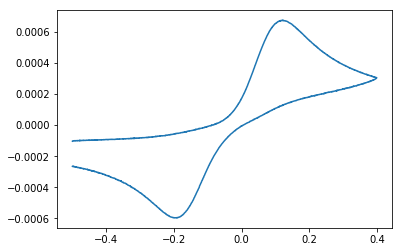

In [55]:
dict_1,n_cycle=file_read.read_file('../Rawdata/20MM_2,7-AQDS_1M_H2SO4_500mVs_0.5step.DTA.txt')
df = file_read.data_frame(dict_1,1)
%matplotlib inline
plt.plot(df['Potential'],df['Current'])

In [56]:
x = pd.to_numeric(df['Potential'])
y = pd.to_numeric(df['Current'])
x1,x2=baseline.split(x)
y1,y2=baseline.split(y)

In [57]:
def sum_mean(vector):
    """
    This function returns the mean values.
    """
    a = 0
    for i in vector:
        a = a + i
    return [a,a/len(vector)]


def multiplica(vetor_x, vetor_y):
    a = 0
    for x,y in zip(vetor_x, vetor_y):
        a = a + (x * y)
    return a


def linear_coeff(x, y):
    """
    This function returns the inclination coeffecient and y axis interception coeffecient m and b. 
    """
    m = (multiplica(x,y) - sum_mean(x)[0] * sum_mean(y)[1]) / (multiplica(x,x) - sum_mean(x)[0] * sum_mean(x)[1])  
    b = sum_mean(y)[1] - m * sum_mean(x)[1]
    return m, b


def y_fitted_line(m, b, x):
    y_base = []
    for i in x:
        y = m * i + b
        y_base.append(y)
    return y_base


def linear_background(x, y):
    idx = critical_idx(x, y) + 5 #this is also arbitrary number we can play with.
    m, b = linear_coeff(x[(idx - int(0.5 * idx)) : (idx + int(0.5 * idx))], y[(idx - int(0.5 * idx)) : (idx + int(0.5 * idx))])
    y_base = y_fitted_line(m, b, x)
    return y_base

[ 4.4e-04  2.1e-04 -3.0e-05 ...  1.6e-04 -3.1e-04 -5.3e-04]
[ 3.4e-04  3.0e-05  1.4e-04 ... -2.4e-04 -6.3e-04 -5.1e-04]
[ 0.00201  0.0022   0.00154 ... -0.00031 -0.00111 -0.00084]
[ 0.00183  0.00151  0.00131 ... -0.00067 -0.00103 -0.00068]


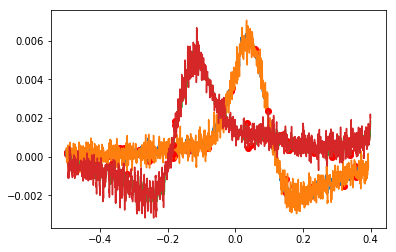

In [64]:
#find linear backgroud
y_pred1 = linear_background(x1,y1)
y_pred2 = linear_background(x2,y2)

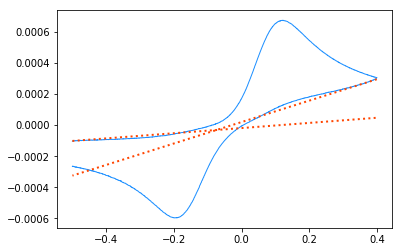

In [65]:
## Plot all data 
plt.plot(x1, y1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(x2, y2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(x1, y_pred1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, y_pred2, color = "orangered", linestyle=':',linewidth=2) 

In [63]:
def critical_idx(x, y): ## Finds index where data set is no longer linear 
    """
    This function takes x and y values callculate the derrivative of x and y, and calculate moving average of 5 and 15 points.
    Finds intercepts of different moving average curves and return the indexs of the first intercepts.
    """
    k = np.diff(y)/(np.diff(x)) #calculated slops of x and y

    ## Calculate moving average for 5 and 15 points.
    ## This two arbitrary number can be tuned to get better fitting.
    ave10 = []
    ave15 = []
    for i in range(len(k)-10):  # The reason to minus 5 is to prevent j from running out of index.
        a = 0 
        for j in range(0,5):
            a = a + k[i+j]
        ave10.append(round(a/5, 5)) # keeping 9 desimal points for more accuracy
    
    for i in range(len(k)-15): 
        b = 0 
        for j in range(0,10):
            b = b + k[i+j]
        ave15.append(round(b/10, 5))
    ave10i = np.asarray(ave5)
    print(ave10i)
    ave15i = np.asarray(ave15)
    print(ave15i)
    ## Find intercepts of different moving average curves
    idx = np.argwhere(np.diff(np.sign(ave15i - ave10i[:len(ave15i)])!= 0)).reshape(-1)+0 #reshape into one row.
    plt.plot(x[idx], ave5i[idx], 'ro') ## Plot intersections 
    plt.plot(x[0:len(ave15)],ave15, x[0:len(ave10)], ave10) ## Plot moving averages
    return idx[1]

In [ ]:
# Let's try on something else.
